In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\CVR\Downloads\COE\headbrain.csv")
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [3]:
data.describe

<bound method NDFrame.describe of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

In [4]:
data.info

<bound method DataFrame.info of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

In [5]:
data.dtypes

Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

In [6]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

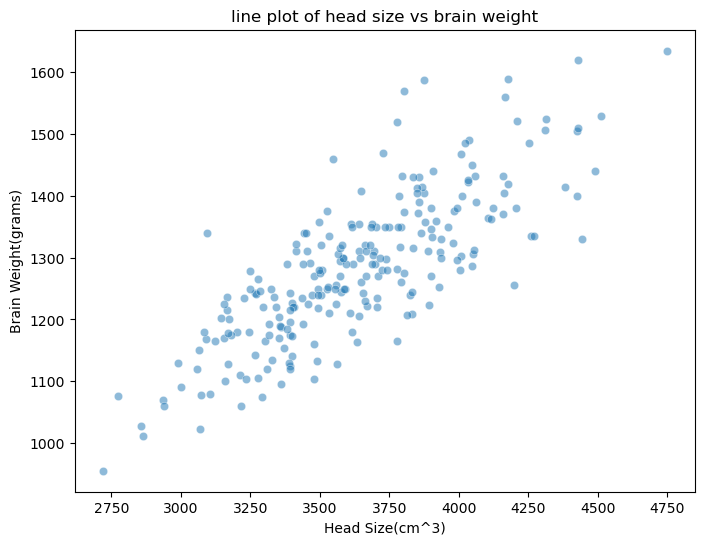

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["Head Size(cm^3)"], y=data["Brain Weight(grams)"], data=data, alpha =0.5)
plt.title('line plot of head size vs brain weight')
plt.show()

In [9]:
corr_matrix=data.corr()
corr_matrix

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


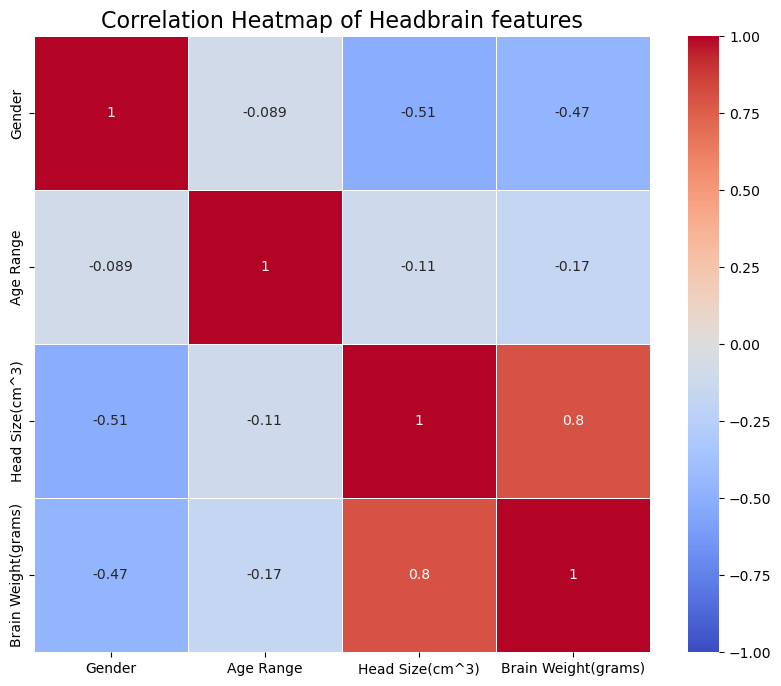

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,center=0,square=True,linewidths=0.5)
plt.title('Correlation Heatmap of Headbrain features',fontsize=16)
plt.show()

In [11]:
import numpy as np

def compute_line_equation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    y2 = y - y_mean
    x2 = x - x_mean
    mul = x2 * y2
    mul_sum = np.sum(mul)
    x2_sqr = np.sum(x2 ** 2)
    m = mul_sum / x2_sqr
    c = y_mean - (m * x_mean)
    return m, c

def predict(x_values, m, c):
    return m * np.array(x_values) + c

def r2(y_p, y_true):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_p) ** 2)
    return 1 - (ss_residual / ss_total)

x = data["Head Size(cm^3)"]
y = data["Brain Weight(grams)"]

m, c = compute_line_equation(x, y)

print(f"Equation of the line: y = {m} x + {c}")

x_new = 4512
y_p = predict(x_new, m, c)

print(f"Predictions for Head Size(cm^3) = {x_new}: Brain Weight(grams) = {y_p}")

r_squared = r2(y_p, y)
print(f"R-squared: {r_squared}")


Equation of the line: y = 0.2634293394893993 x + 325.5734210494428
Predictions for Head Size(cm^3) = 4512: Brain Weight(grams) = 1514.1666008256125
R-squared: -3.7096998900195732


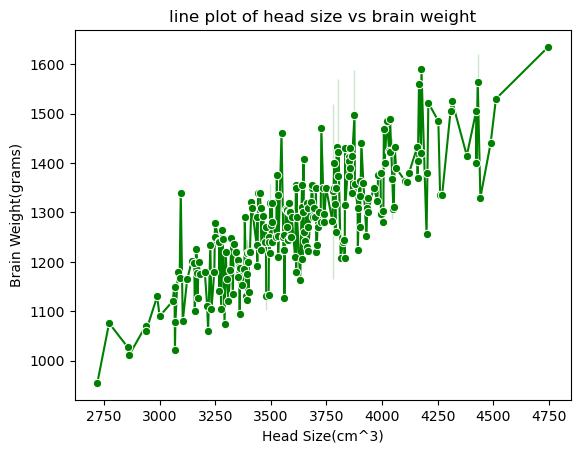

In [12]:
sns.lineplot(data=data,x=data["Head Size(cm^3)"],y=data["Brain Weight(grams)"],marker='o',color='green')
plt.title("line plot of head size vs brain weight")
plt.show()